In [122]:
from twec.twec import TWEC


PATH = "/Users/horus/PycharmProjects/SemanticProj/"
# !cat *.txt > compass.txt

In [127]:
def train_twec_and_save(
               year
               , data_augmented_path
               , model_path
               , aligner=None
               , overwrite=True
               , size=300
               , siter=10
               , diter=10
               , workers=4
               #, opath="model_aug"
              ):
    """
    year: str
    data_augmented_path: the path to the data_augmented file that holds all data_augmented
    size: Number of dimensions. Default is 100.
    sg: Neural architecture of Word2vec. Default is CBOW (). If 1, Skip-gram is employed.
    siter: Number of static iterations (epochs). Default is 5.
    diter: Number of dynamic iterations (epochs). Default is 5.
    ns: Number of negative sampling examples. Default is 10, min is 1.
    window: Size of the context window (left and right). Default is 5 (5 left + 5 right).
    alpha: Initial learning rate. Default is 0.025.
    min_count: Min frequency for words over the entire corpus. Default is 5.
    workers: Number of worker threads. Default is 2.
    test: Folder name of the diachronic corpus files for testing.
    opath: Name of the desired output folder. Default is model.
    rtype: None (model saved to certain model path)
    """
    if not aligner:
        aligner = TWEC(size, siter, diter, workers)
        aligner.train_compass(data_augmented_path + "compass.txt", overwrite)
    model = aligner.train_slice(data_augmented_path + year + ".txt", save=True)
    model.save(model_path + year + ".model")

In [129]:
DATAPATH = PATH + "data_augmented/" # year.txt
MODELPATH = PATH + "model/"

for yr in range(1994, 2022):
    train_twec_and_save(year=str(yr), data_augmented_path=DATAPATH, model_path=MODELPATH)

In [37]:
from gensim.models.word2vec import Word2Vec


all_twec_models = []
for i in range(1994, 2022):
    cur_model = Word2Vec.load(MODELPATH + str(i) + ".model")
    all_twec_models.append(cur_model)
len(all_twec_models)

28

## Mutually Occurred Words

In [11]:
set_of_compass_words = set()
for i in range(1994, 2022):
    with open(PATH+"data_augmented/"+str(i)+".txt", 'r') as f:
        cur_year_word = set(f.read().split())
        set_of_compass_words.update(cur_year_word)

set_of_mutual_word = set_of_compass_words
for i in range(1994, 2022):
    with open(PATH+"data_augmented/"+str(i)+".txt", 'r') as f:
        cur_year_word = set(f.read().split())
    set_of_mutual_word = set_of_mutual_word.intersection(cur_year_word)

len(set_of_mutual_word)

7278

In [43]:
from collections import Counter

THRESHOLD = 100

set_of_words_common_in_PPMI = set_of_mutual_word
for i in range(1994, 2022):
    with open(PATH+"data_augmented/"+str(i)+".txt", 'r') as f:
        cur_year_word_cnt = Counter(f.read().split())
    cur_common = [k for k, v in cur_year_word_cnt.items() if v > THRESHOLD]
    set_of_words_common_in_PPMI = set_of_words_common_in_PPMI.intersection(cur_common)

len(set_of_words_common_in_PPMI)

494

In [49]:
with open(PATH+"data_augmented/"+"compass.txt", 'r') as f:
    all_wordcnt = Counter(f.read().split())

common_wordcnt = {}
for word in set_of_words_common_in_PPMI:
    common_wordcnt[word] = all_wordcnt[word]

AttributeError: 'str' object has no attribute 'values'

In [53]:
freq_common_word_ls = sorted(common_wordcnt.items(), key=lambda x: x[1], reverse=True)

In [56]:
freq_common_word_dict = dict(freq_common_word_ls)
freq_common_word_dict
# network, performance, analysis, language, speech, image, information, grammar, parse, structure
# semantic, lexical, corpus, corpora, knowledge, feature, syntactic, text, tag, parser, machine, linguisitic, discourse

{'data': 2418674,
 'paper': 1992427,
 'method': 1648052,
 'model': 1476224,
 'information': 1458924,
 'network': 1197694,
 'algorithm': 1151453,
 'performance': 1060451,
 'control': 975827,
 'systems': 974901,
 'time': 950724,
 'new': 910493,
 'approach': 876793,
 'design': 869677,
 'different': 856173,
 'use': 847042,
 'analysis': 827422,
 'problem': 776552,
 'process': 739331,
 'image': 719952,
 'research': 647580,
 'methods': 635201,
 'study': 629859,
 'present': 597595,
 'user': 572564,
 'applications': 559363,
 'number': 553614,
 'application': 543510,
 'communication': 524945,
 'work': 516662,
 'set': 514135,
 'high': 507167,
 'order': 502684,
 'propose': 478066,
 'signal': 477880,
 'algorithms': 474825,
 'development': 452728,
 'users': 450957,
 'techniques': 443300,
 'provide': 433678,
 'detection': 418278,
 'quality': 405779,
 'important': 405549,
 'problems': 399322,
 'knowledge': 392041,
 'framework': 380538,
 'language': 377339,
 'structure': 373758,
 'second': 367545,
 'te

In [52]:
import random as rdm
rdm.sample(set_of_words_common_in_PPMI, k=3)

/var/folders/rb/fh4dwvps3nvd59fvw4jnl7dc0000gq/T/ipykernel_50614/3256879592.py:2: DeprecationWarning:

Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.



['compare', 'vector', 'effectively']

In [15]:
import random as rdm
rdm.sample(set_of_mutual_word, k=2)

/var/folders/rb/fh4dwvps3nvd59fvw4jnl7dc0000gq/T/ipykernel_50614/3965631515.py:2: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  rdm.sample(set_of_mutual_word, k=2)


['adopt', 'paradigm']

In [47]:
import pandas as pd

freq = pd.read_csv("frequency_of_common_words", delimiter="\t") # freq_threshold = 0.05 (>=)
freq.head()

,Words,Occurrences,Frequency
0,use,235,0.98
1,model,233,0.97
2,paper,183,0.76
3,base,169,0.70
4,language,147,0.61


# Similar Words as Contexts for Selected WORD from 1994 to 2021 in CS arXiv Papers

## test some randomly sampled WORD

In [40]:
sims = {}
WORD = "corpora"
for i, model in enumerate(all_twec_models):
    # every year, model is loaded same as gensim.Word2Vec KeyedVector instances
    # vec = model.wv["corpora"] # word = "deep"
    sims[i+1994] = model.wv.most_similar(WORD, topn=5)

In [41]:
sims[1994]

[('corpus', 0.9351125955581665),
 ('dictionaries', 0.8982241749763489),
 ('morphologically', 0.8885154128074646),
 ('lexicon', 0.8837098479270935),
 ('collocations', 0.8813675045967102)]

In [42]:
sims[2021]

[('parallel', 0.8502575755119324),
 ('domains', 0.8438419699668884),
 ('resources', 0.8420442938804626),
 ('settings', 0.8400020599365234),
 ('monolingual', 0.8149354457855225)]

# Choose/Select CS-Research-related/Domain-specific words
1. hand-pick words of interest that are also frequent throughtout the two decades
2. find the "mutual" set of words in this CS research domain specific corpus that also proved to have drastically changed their meanings in the general corpus

In [36]:
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

## Histogram of Selected WORD

## N-gram WordCloud

In [62]:
from wordcloud import  WordCloud


def plot_wordcloud(d):
    wc = WordCloud()
    wc.fit_words(d)
    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(111)
    ax.imshow(wc)
    ax.axis('off')

(-0.5, 399.5, 199.5, -0.5)

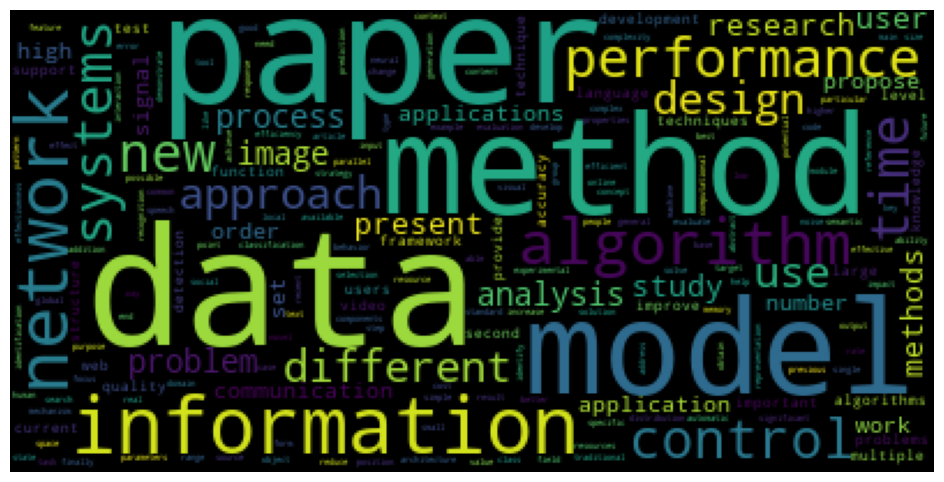

In [60]:
plot_wordcloud(freq_common_word_dict)

In [69]:
bigrams = pd.read_csv("top_bigrams.csv", delimiter="\t")
trigrams = pd.read_csv("top_trigrams.csv", delimiter="\t")

In [70]:
bigrams.sort_values(by="Occurrences", ascending=False)

,Bigrams,Occurrences
0,natural language,45
1,hundred and,45
2,nine hundred,35
3,one thousand,35
4,paper present,33
...,...,...
150,level morphology,4
149,information retrieval,4
148,model call,4
147,software engineering,4


In [71]:
trigrams.sort_values(by="Occurrences", ascending=False)

,Trigrams,Occurrences
0,nine hundred and,35
2,thousand nine hundred,32
1,one thousand nine,32
3,hundred and ninety,28
4,natural language process,13
...,...,...
169,natural definition synchronous,2
168,model consider model,2
167,parallel memorybased parser,2
166,model use speech,2


In [ ]:
print(bigrams.head(10).to_latex(index=False))

In [ ]:
print(trigrams.head(10).to_latex(index=False))

## Packed Bubble Chart

## Chord Diagram

# tSNE & visualize similar words as context

In [48]:
from sklearn.manifold import TSNE

In [76]:
import numpy as np


def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)

    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(np.array(tokens))

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()


In [ ]:
"""
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=500, workers=4)
tsne_plot(model)
"""

In [ ]:
%%timeit
# took way tooooooo long

# PCA -> dim = 2 & Visualize WORD with its context (top 10 similar words)

In [80]:
from gensim.test.utils import datapath


model.wv.evaluate_word_pairs(datapath('wordsim353.tsv'))

(PearsonRResult(statistic=0.2589959524874012, pvalue=0.0010956761272939769),
 SpearmanrResult(correlation=0.29512255662009407, pvalue=0.00018395553356397205),
 55.80736543909348)

In [89]:
m94 = Word2Vec.load(MODELPATH + "1994.model")
m94.wv.most_similar("deep")

[('apparent', 0.7784367799758911),
 ('subsurface', 0.7672096490859985),
 ('earths', 0.7307579517364502),
 ('reflected', 0.7105376124382019),
 ('manmade', 0.7094939351081848),
 ('propagating', 0.7049685716629028),
 ('longrange', 0.7005835175514221),
 ('topography', 0.6978105902671814),
 ('formations', 0.6974858641624451),
 ('turbulence', 0.6880066990852356)]

In [88]:
m20 = Word2Vec.load(MODELPATH + "2020.model")
m20.wv.most_similar("deep")

[('learningbased', 0.8433396816253662),
 ('deeplearning', 0.8272819519042969),
 ('networkbased', 0.826429009437561),
 ('metalearning', 0.8221878409385681),
 ('semisupervised', 0.821755588054657),
 ('supervised', 0.8134278655052185),
 ('neural', 0.8072159886360168),
 ('costsensitive', 0.8040831089019775),
 ('convolutional', 0.8013107776641846),
 ('cnnbased', 0.7911092042922974)]

In [116]:
WORD = "corpora" # "deep"
vec_ls = []
for model in all_twec_models:
    vec_ls.append(model.wv[WORD])

In [104]:
len(vec_ls)

28

In [117]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
reduced_vec_ar = pca.fit_transform(vec_ls)

Text(0.5, 1.0, "corpora's dimension reduced word vector change in time")

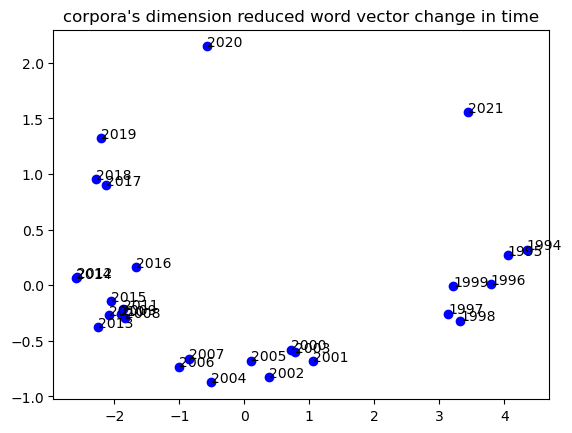

In [118]:
from matplotlib.pyplot import scatter, text, title

yr = 1994
for x, y in reduced_vec_ar:
    scatter(x, y, c="b")
    text(x, y, s=str(yr))
    yr += 1
title(f"{WORD}'s dimension reduced word vector change in time")

In [91]:
m94.wv.most_similar("machine")

[('machines', 0.7859814763069153),
 ('distributedmemory', 0.6983523964881897),
 ('accelerator', 0.6965941786766052),
 ('coarsegrained', 0.6928542256355286),
 ('mimd', 0.6827229261398315),
 ('boltzmann', 0.6819548010826111),
 ('turing', 0.6784939169883728),
 ('executes', 0.6723200678825378),
 ('core', 0.6707051396369934),
 ('generalpurpose', 0.6667578816413879)]

In [86]:
m20.wv.most_similar("machine")

[('ml', 0.7848069071769714),
 ('elm', 0.7138784527778625),
 ('svms', 0.7115345001220703),
 ('supervised', 0.6919371485710144),
 ('widely', 0.6646667122840881),
 ('deep', 0.6592514514923096),
 ('learning', 0.6585578322410583),
 ('svm', 0.6585127711296082),
 ('support', 0.6479228734970093),
 ('lifelong', 0.6422246098518372)]

In [92]:
len(freq_common_word_ls)

494

In [97]:
from scipy.spatial.distance import cosine


first_last_dist = []
for wd, _ in freq_common_word_ls:
    first_last_dist.append([wd, cosine(m94.wv[wd], m20.wv[wd])])

sorted(first_last_dist, key=lambda x: x[1])

[['cost', 0.019403398036956787],
 ['noise', 0.027379751205444336],
 ['control', 0.029567182064056396],
 ['different', 0.03052043914794922],
 ['reduce', 0.030716419219970703],
 ['problems', 0.03124302625656128],
 ['affect', 0.03209817409515381],
 ['interaction', 0.03472393751144409],
 ['time', 0.03672605752944946],
 ['empirical', 0.03704202175140381],
 ['need', 0.0395737886428833],
 ['research', 0.04062408208847046],
 ['similarity', 0.04077637195587158],
 ['significant', 0.0412217378616333],
 ['future', 0.04251444339752197],
 ['number', 0.04273861646652222],
 ['image', 0.04381251335144043],
 ['improve', 0.044210970401763916],
 ['size', 0.0443539023399353],
 ['quality', 0.04534679651260376],
 ['better', 0.0456581711769104],
 ['resources', 0.046540915966033936],
 ['discourse', 0.04739546775817871],
 ['years', 0.04870307445526123],
 ['classification', 0.04882115125656128],
 ['function', 0.04912620782852173],
 ['problem', 0.04921460151672363],
 ['high', 0.0495607852935791],
 ['complexity', 

In [98]:
sorted(first_last_dist, key=lambda x: -x[1])

[['token', 0.8186430782079697],
 ['deep', 0.8160728365182877],
 ['advance', 0.7261322438716888],
 ['cross', 0.6761338114738464],
 ['release', 0.6674612760543823],
 ['transfer', 0.5823035538196564],
 ['end', 0.5633382201194763],
 ['pair', 0.5531298816204071],
 ['bias', 0.5326032340526581],
 ['pipeline', 0.5321346521377563],
 ['modal', 0.5095565617084503],
 ['competitive', 0.4794689416885376],
 ['result', 0.47583967447280884],
 ['settings', 0.46503275632858276],
 ['seven', 0.46112191677093506],
 ['limit', 0.44728028774261475],
 ['zero', 0.4425048828125],
 ['additionally', 0.43979257345199585],
 ['exist', 0.42951709032058716],
 ['specifically', 0.4204840064048767],
 ['gap', 0.4175679087638855],
 ['adaptation', 0.4155377745628357],
 ['attention', 0.409046471118927],
 ['state', 0.40538763999938965],
 ['abstract', 0.3922610282897949],
 ['adopt', 0.3872871994972229],
 ['head', 0.3787611126899719],
 ['instead', 0.37797456979751587],
 ['art', 0.374830961227417],
 ['strong', 0.37124377489089966]

In [99]:
first_last_dist_2 = []
for wd in set_of_mutual_word:
    first_last_dist_2.append([wd, cosine(m94.wv[wd], m20.wv[wd])])

sorted(first_last_dist_2, key=lambda x: x[1])

[['fourier', 0.017302989959716797],
 ['multiplication', 0.018418431282043457],
 ['cup', 0.018729448318481445],
 ['cost', 0.019403398036956787],
 ['heuristic', 0.02332615852355957],
 ['tagger', 0.023527860641479492],
 ['government', 0.023597776889801025],
 ['inconsistently', 0.024935424327850342],
 ['theorem', 0.025039732456207275],
 ['coefficients', 0.025056958198547363],
 ['institutions', 0.025498509407043457],
 ['undergraduate', 0.027196526527404785],
 ['noise', 0.027379751205444336],
 ['withthe', 0.027772188186645508],
 ['noun', 0.028787851333618164],
 ['universities', 0.029073059558868408],
 ['control', 0.029567182064056396],
 ['worldview', 0.03016042709350586],
 ['hardware', 0.030285775661468506],
 ['acyclic', 0.03038233518600464],
 ['different', 0.03052043914794922],
 ['reduce', 0.030716419219970703],
 ['year', 0.030839204788208008],
 ['practice', 0.031192660331726074],
 ['problems', 0.03124302625656128],
 ['throughput', 0.03131091594696045],
 ['temperature', 0.03148764371871948]

In [100]:
sorted(first_last_dist_2, key=lambda x: -x[1])

[['distillation', 1.2074057906866074],
 ['dst', 1.1770337373018265],
 ['downstream', 1.1160117611289024],
 ['erp', 1.10982845723629],
 ['triple', 1.0912236720323563],
 ['hint', 1.0851611569523811],
 ['recommendation', 1.078542709350586],
 ['meteor', 1.076205462217331],
 ['mrc', 1.059585813432932],
 ['dyadic', 1.0515552461147308],
 ['att', 1.0512611605226994],
 ['ablation', 1.0455948784947395],
 ['acronym', 1.0448469184339046],
 ['kg', 1.0420738942921162],
 ['dis', 1.0359751507639885],
 ['ee', 1.0314218550920486],
 ['uni', 1.0307521037757397],
 ['cast', 1.0230807736515999],
 ['supervise', 1.018073957413435],
 ['coders', 1.0104274908080697],
 ['subtitle', 1.0057493159547448],
 ['supervision', 1.001752965617925],
 ['hesitant', 0.9993689859984443],
 ['mis', 0.994154145475477],
 ['finetune', 0.9940835330635309],
 ['warm', 0.9929321077652276],
 ['craft', 0.9913772298023105],
 ['sts', 0.9852092042565346],
 ['sr', 0.974881948903203],
 ['smt', 0.9746029060333967],
 ['dl', 0.9705954492092133],
 

# Next Steps